## 1: Import Packages: 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## 2: Load Data: 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3: EDA: 

### A. Univariate Analysis:  

1. Histogram: 

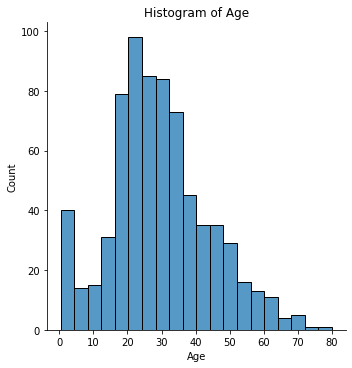

In [4]:
sns.displot(df['Age'])
plt.title('Histogram of Age')
plt.savefig('histogram.png',bbox_inches='tight',pad_inches=0.2)
plt.show()

2. Countplot: 

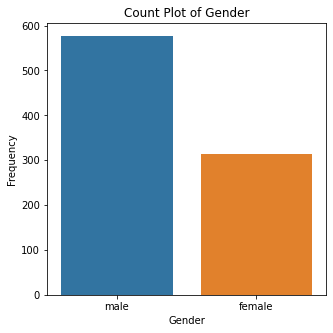

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Sex',data=df)
ax.set_title('Count Plot of Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
plt.savefig('CountPlot.png')

3. Five Number Summary: 

In [6]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

4. Box Plot: 

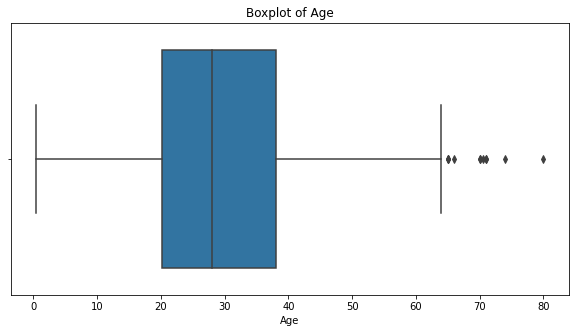

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='Age', data=df)
ax.set_title('Boxplot of Age')
plt.savefig('Boxplot.png')

5. Boxen Plot: 

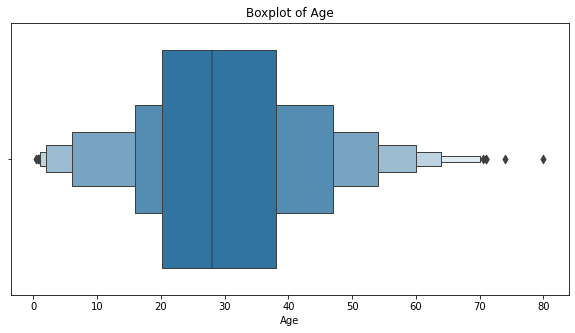

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxenplot(x='Age', data=df)
ax.set_title('Boxplot of Age')
plt.savefig('Boxenplot.png')

6. Volin Plot: 

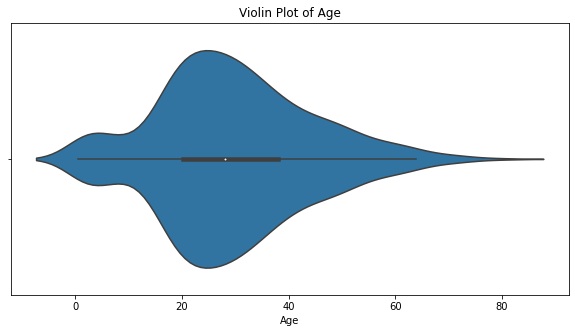

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='Age', data=df)
ax.set_title('Violin Plot of Age')
plt.savefig('Violin.png')

### B. Bivariate Analysis:  

1. Barplot: 

Can gender have any impact on survival? 

In [13]:
analysis = df.groupby(by=['Sex','Survived']).size().reset_index().rename(columns={0:'Frequency'})

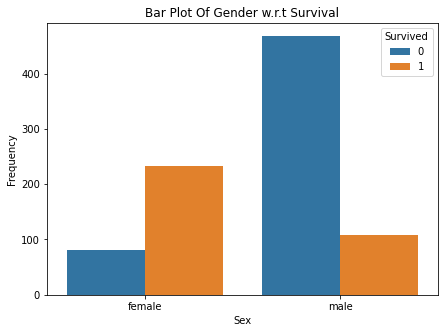

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Bar Plot Of Gender w.r.t Survival')
sns.barplot(x='Sex',y='Frequency',hue='Survived',data=analysis, ci=False)
#plt.legend({'Died':'Blue','Survived':'orange'})
plt.savefig('Barplot-Bivariate.png')


2. Scatter Plot: 

Can age have any impact on the fare of passenger? 

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


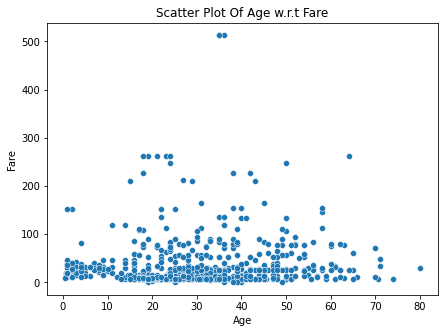

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Scatter Plot Of Age w.r.t Fare')
sns.scatterplot(x='Age',y='Fare',data=df)
plt.savefig('Scatterplot-Bivariate.png')


3. Line Plot: 

What is the average fare per age?

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df = df[df['Age'].notnull()]

In [20]:
df.loc[:,'Age'] = df['Age'].apply(lambda x: round(x))

In [21]:
analysis = df.groupby(by=['Age'])['Fare'].mean().reset_index()
analysis

,Age,Fare
0,0,8.516700
1,1,35.566023
2,2,37.536250
3,3,25.781950
4,4,29.543330
...,...,...
66,66,10.500000
67,70,29.750000
68,71,42.079200
69,74,7.775000


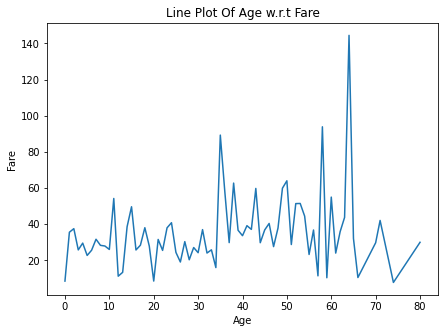

In [22]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Line Plot Of Age w.r.t Fare')
sns.lineplot(x='Age',y='Fare',data=analysis)
plt.savefig('Lineplot-Bivariate.png')


4. Cross Table: 

In [23]:
pd.crosstab(df['Sex'],df['Pclass'])

Pclass,1,2,3
Sex,,,
female,85,74,102
male,101,99,253


5. Box Plot with 2 variables: 

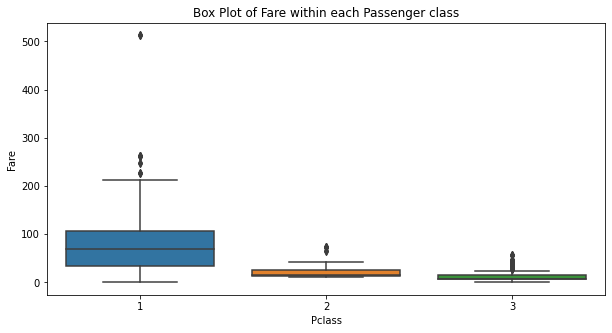

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='Pclass',y='Fare', data=df)
ax.set_title('Box Plot of Fare within each Passenger class')
plt.savefig('Boxplot-2-variables.png')
plt.show()